In [1]:
!pip install opendatasets --upgrade

In [2]:
import torch
import torchvision
import numpy as np
import seaborn as sn
import matplotlib.image as mpimg
import pathlib
import PIL
import torchvision.transforms as transform
import os

import tarfile
import matplotlib
import matplotlib.pyplot as plt
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch import nn
import torch.nn.functional as F

In [3]:
# import opendatasets as od
# dataset_url = 'https://www.kaggle.com/moltean/fruits'
# od.download(dataset_url)

In [8]:
import os

data_dir =  './archive/fruits-360_dataset/fruits-360'

tarin_dir_pathlib = pathlib.Path(data_dir+"/Training/")
test_dir_pathlib = pathlib.Path(data_dir+"/Test/")
# multi_test_dir = data_dir+'test-multiple_fruits/'
classes = os.listdir(data_dir + "/Training")
print(classes[:10])

['Tomato 4', 'Apple Red Delicious', 'Tomato 3', 'Huckleberry', 'Blueberry', 'Pear Red', 'Banana Lady Finger', 'Melon Piel de Sapo', 'Pear', 'Cherry 1']


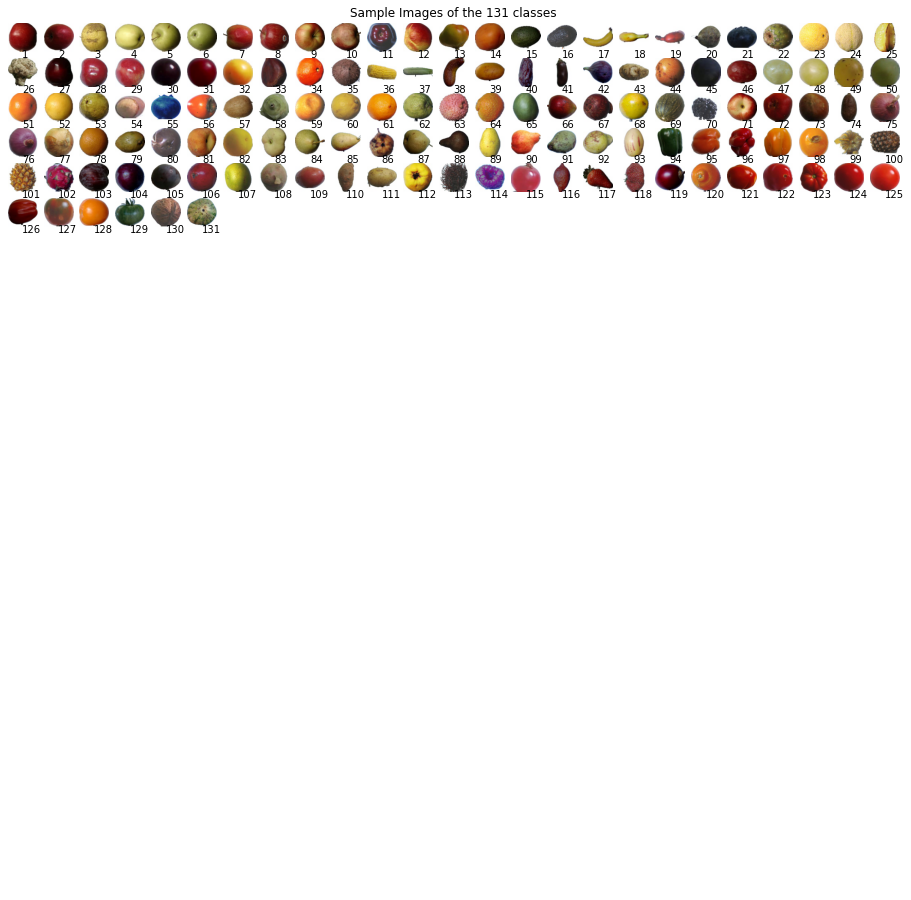

In [10]:
#visualization 1 - raw image inputs 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

classes = os.listdir("./archive/fruits-360_dataset/fruits-360/Training")
classes.sort()
images = []
classesSize = []
for folder in classes:
    imageFiles = os.listdir("./archive/fruits-360_dataset/fruits-360/Training/"+folder)
    images.append("./archive/fruits-360_dataset/fruits-360/Training/"+folder+'/'+imageFiles[0])
    classesSize.append(len(imageFiles))
fig = plt.figure(figsize=(16,16))
plt.title(label='Sample Images of the '+str(len(classes))+' classes')
plt.axis('off')
for i, img in enumerate(images):
    fig.add_subplot(25,25,i+1)
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.text(x = 50, y =120, s=str(i+1))
    plt.axis('off')


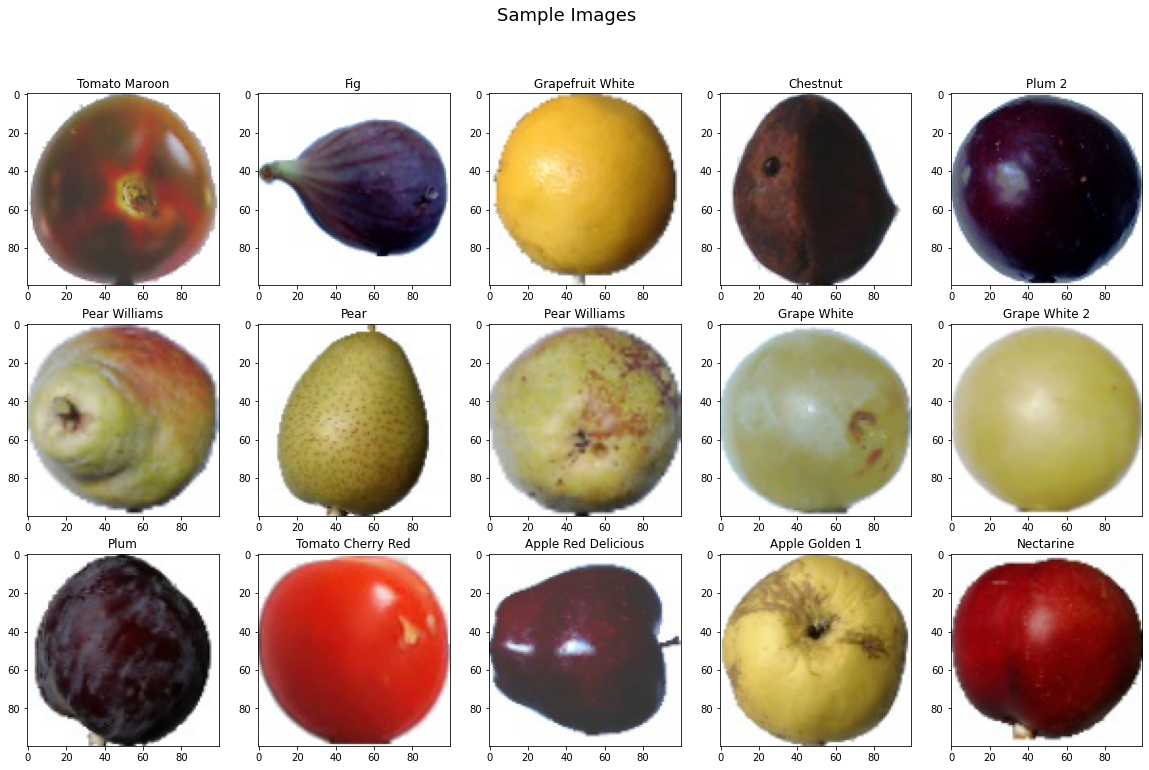

In [12]:
#VISUALIZATION 2 
#not normalized - need for preprocessing--> cropping, showing it in different orientations, confusing fruits,  
import random
images = [
    (os.path.join("./archive/fruits-360_dataset/fruits-360/Training", DIR, random.choice(
        os.listdir(os.path.join("./archive/fruits-360_dataset/fruits-360/Training",DIR
                              ))
    )), DIR) for DIR in random.choices(os.listdir("./archive/fruits-360_dataset/fruits-360/Training"), k=15)
]

fig, ax = plt.subplots(3, 5, figsize=(20, 12))
fig.suptitle('Sample Images', fontsize=18)

for i, img in enumerate(images):
    ax[i//5][i%5].imshow(plt.imread(img[0]))
    ax[i//5][i%5].set_title(img[1], fontsize=12)

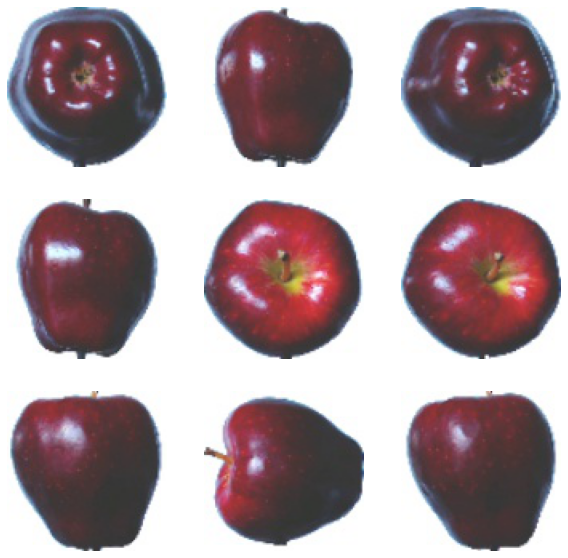

In [13]:
#visualization 3- different orientations of the same image
fruits = list(tarin_dir_pathlib.glob("Apple Red Delicious/*.jpg"))
# fruits[:2]
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')
    
plt.show()

In [14]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir(tarin_dir_pathlib):
    train_categories.append(i)
    
    train_samples.append(len(os.listdir( './archive/fruits-360_dataset/fruits-360/Training/'+ i)))

test_categories = []
test_samples = []
for i in os.listdir(test_dir_pathlib):
    test_categories.append(i)
    test_samples.append(len(os.listdir('./archive/fruits-360_dataset/fruits-360/Test/'+ i)))

    
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Set set:", sum(test_samples))

Count of Fruits in Training set: 67692
Count of Fruits in Set set: 22688


Shape: (100, 100, 3)


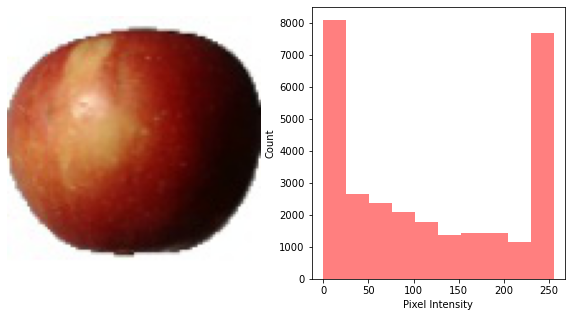

In [15]:
#visualization 4- pixel intensity - Sometimes the data is normalized in advance, but as you can see in the graph, this is not the case, so the data will have to be normalized

img = mpimg.imread('./archive/fruits-360_dataset/fruits-360/Training/' + "Apple Braeburn/0_100.jpg")
print("Shape:", img.shape)
def plotHist(img):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, color='r', alpha=0.5)

plotHist(img)

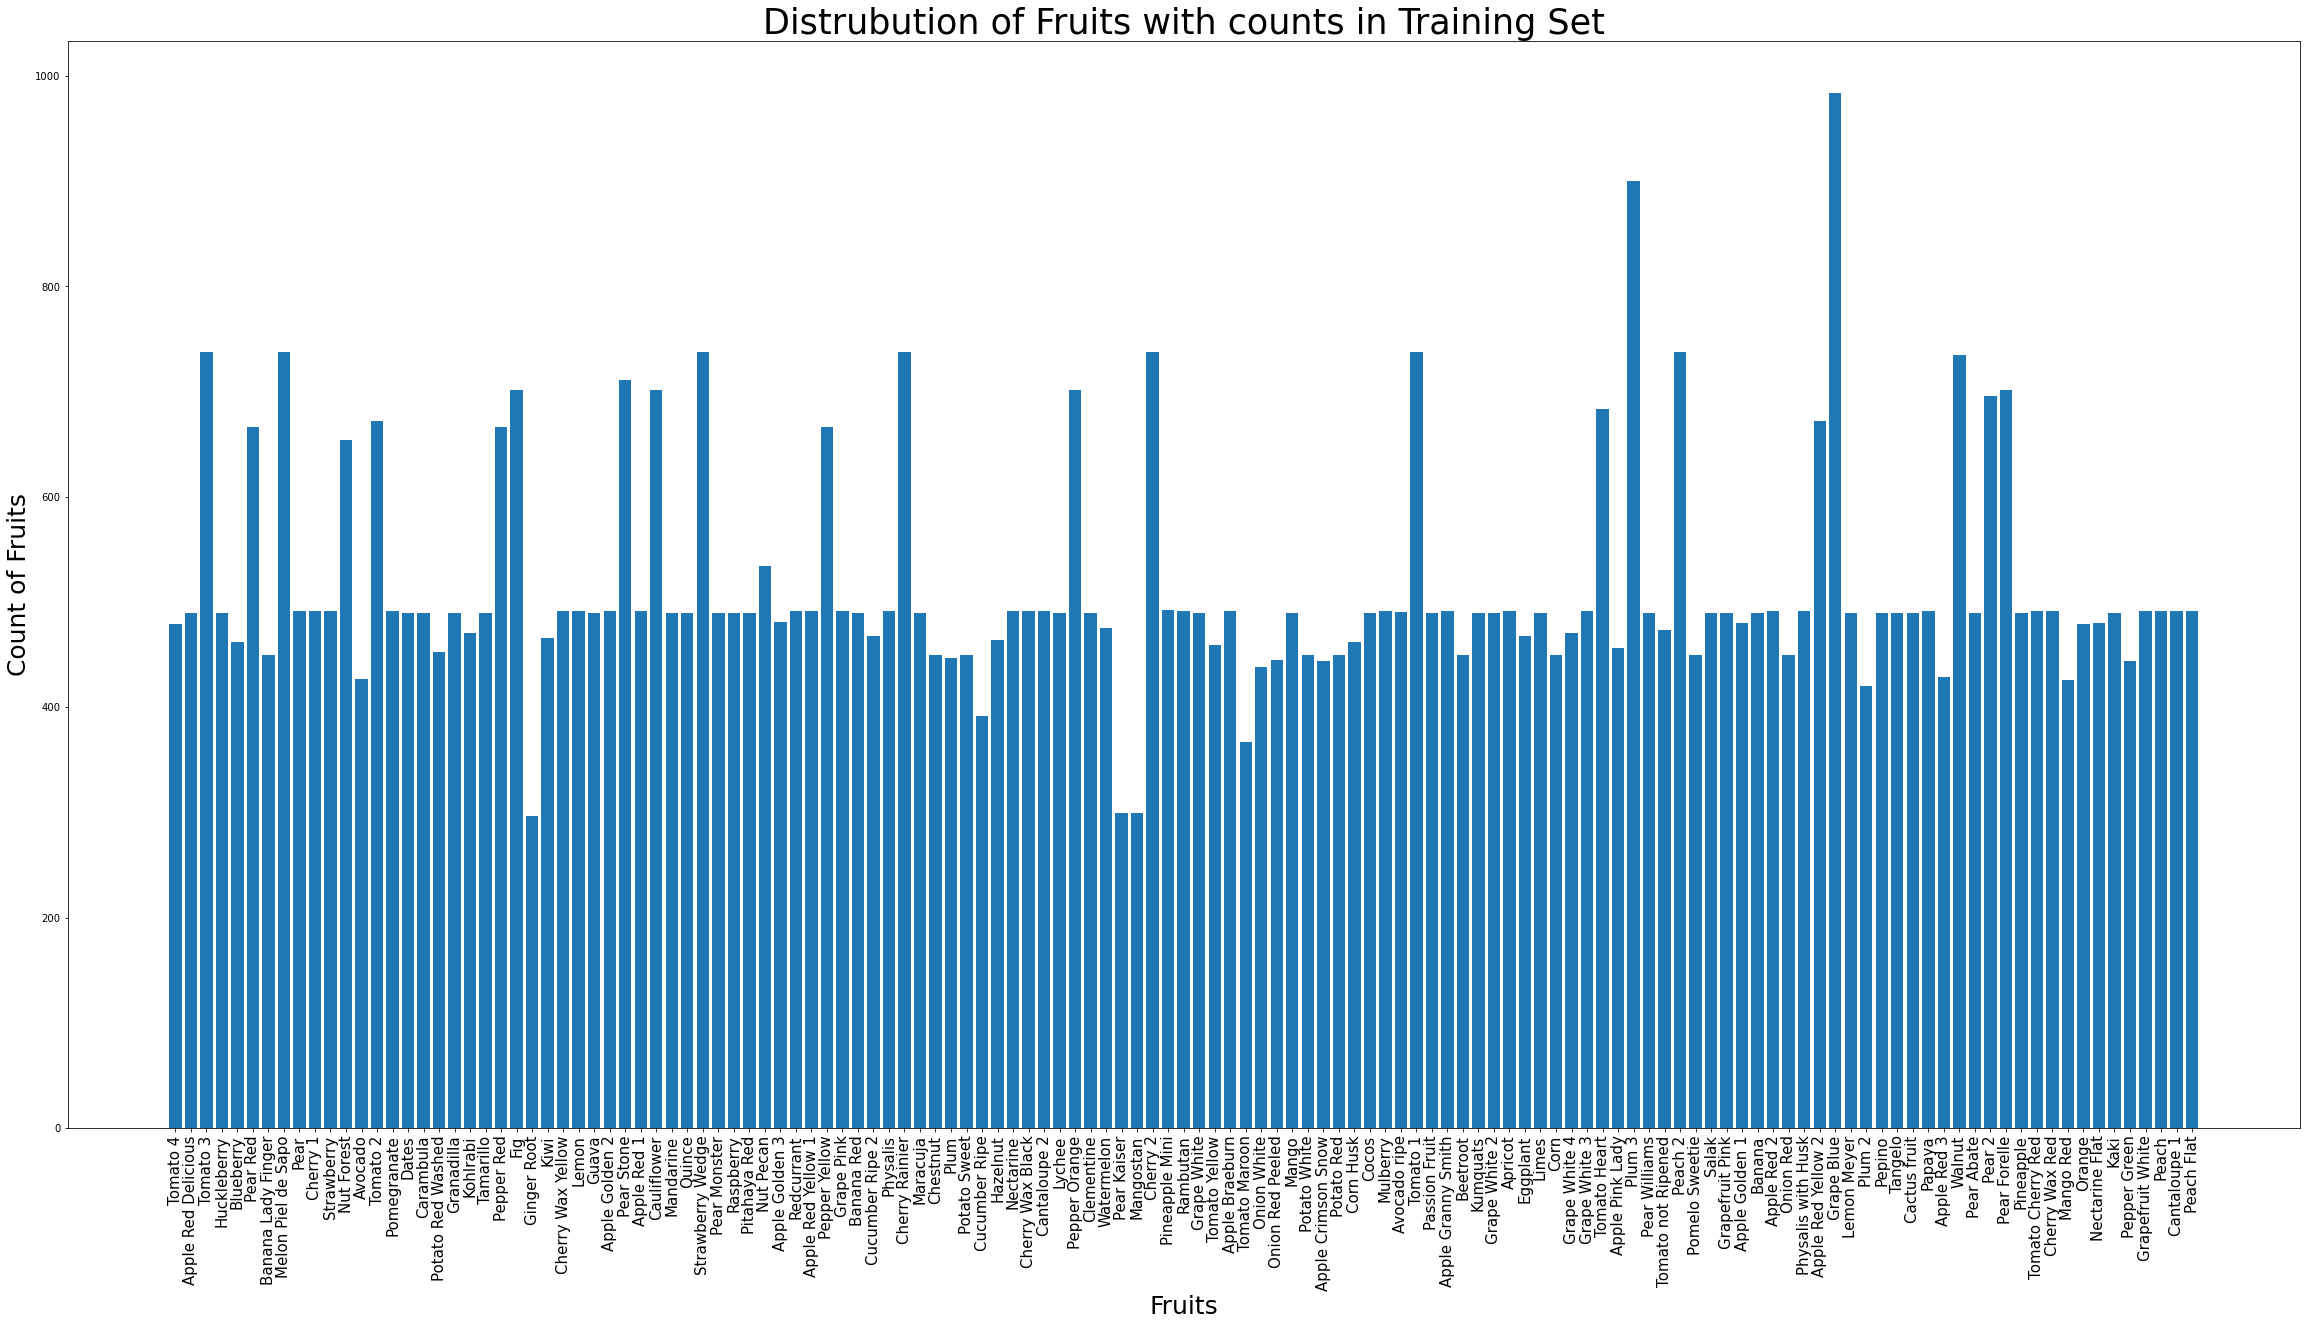

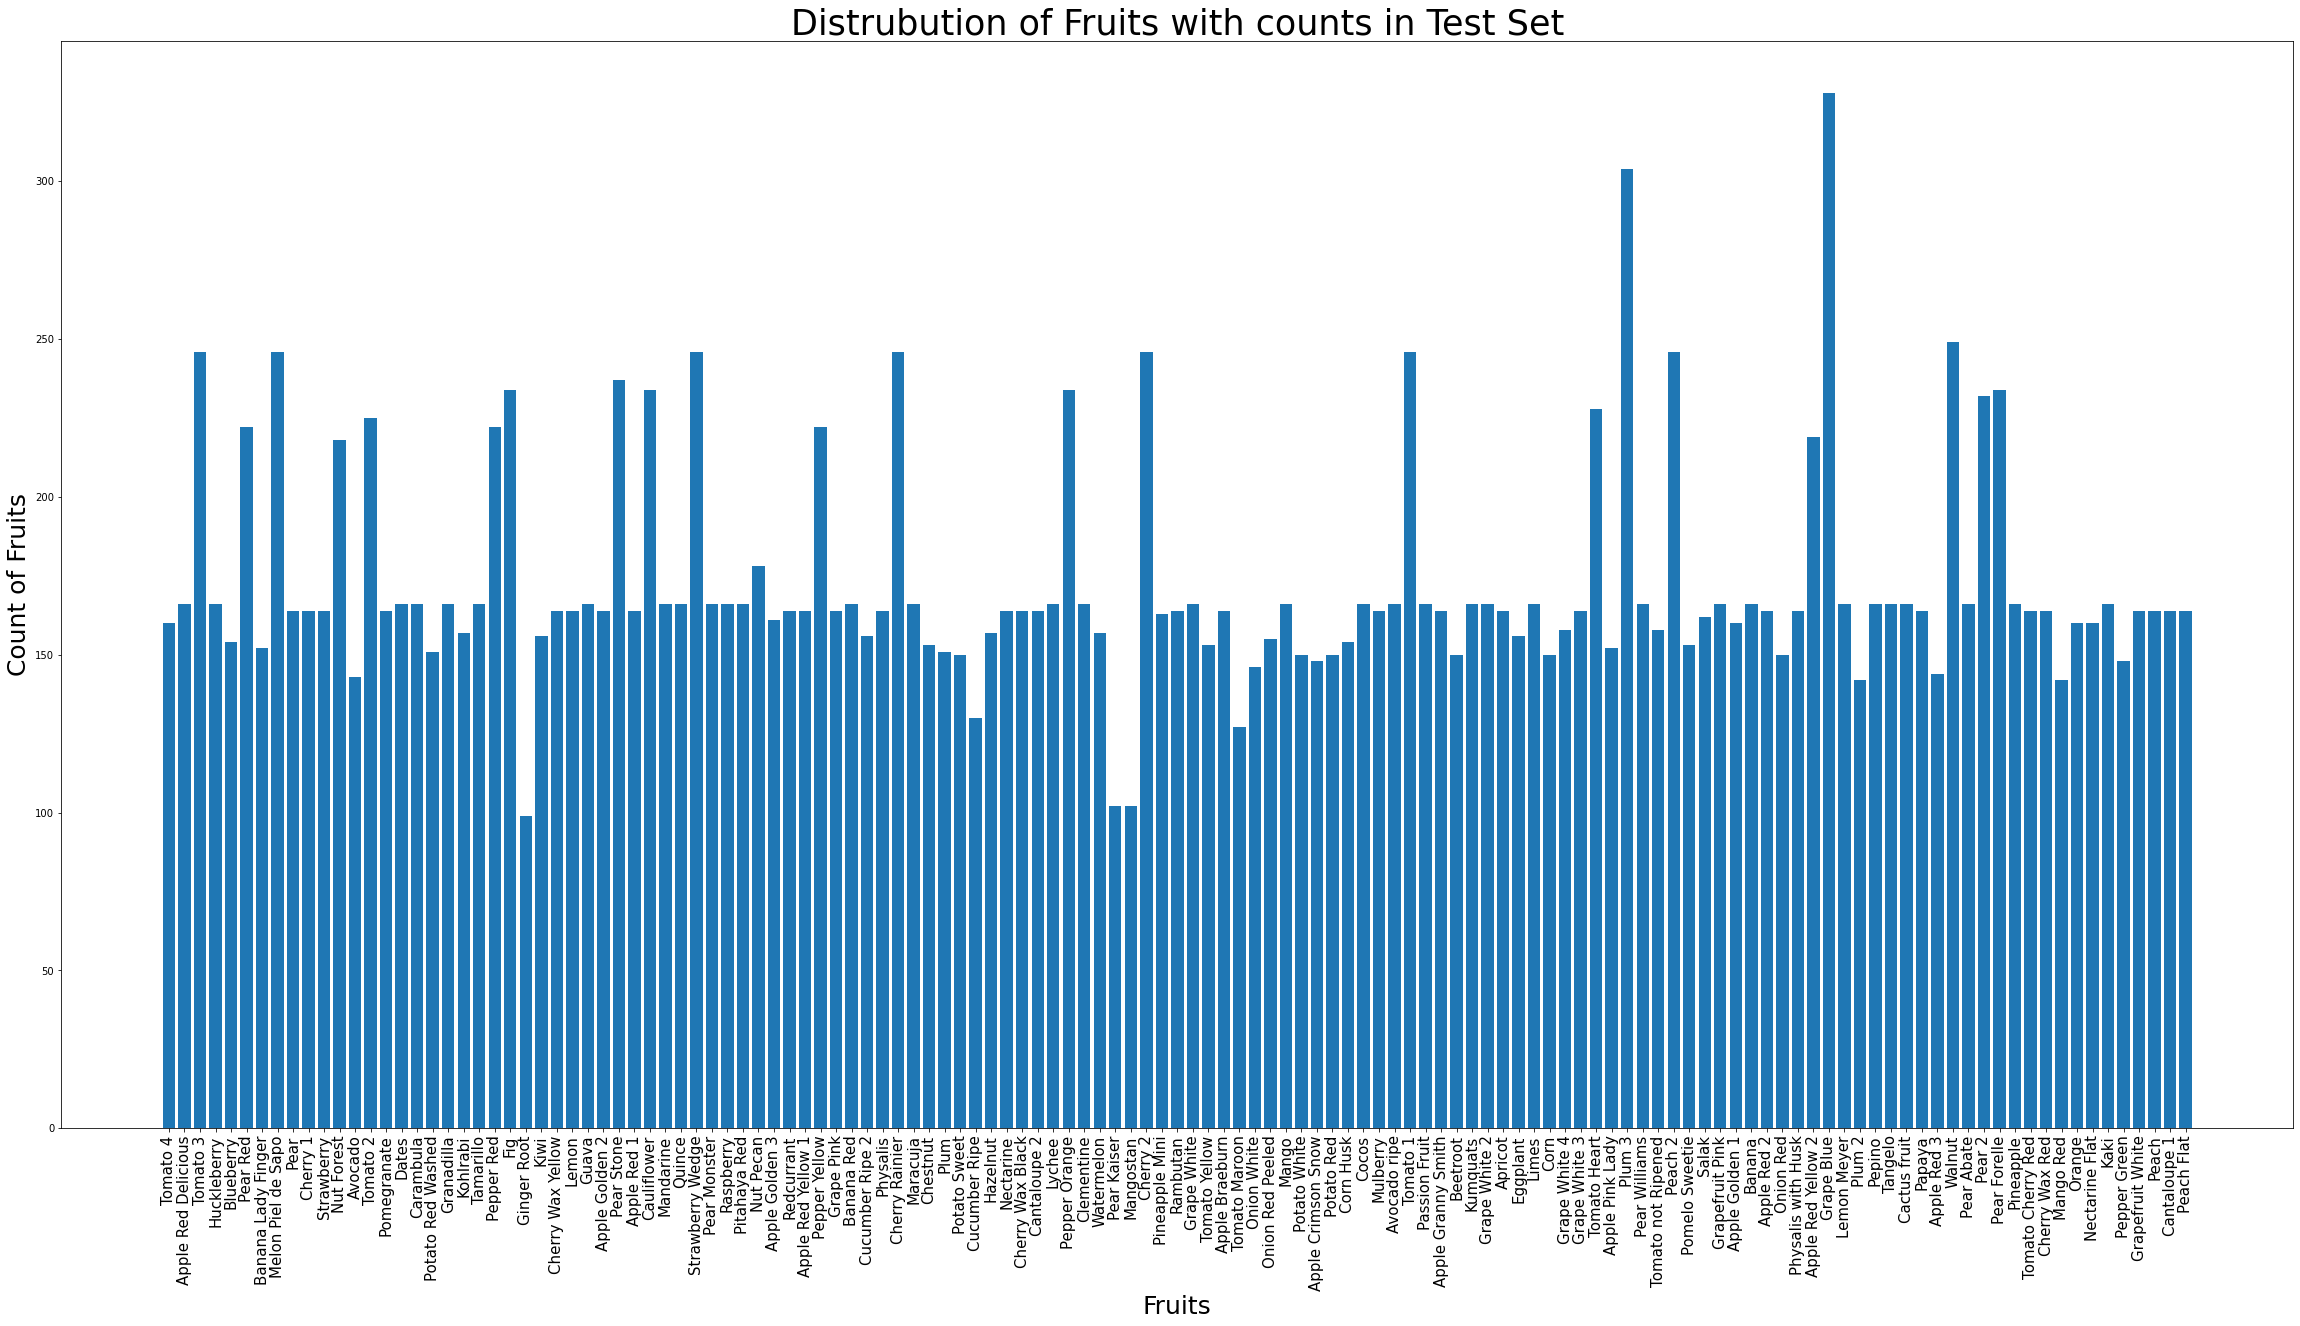

In [16]:
#viusalization 5
#As we can see some class of images have more training data but mostly it is even
#.Because of this our model may be better at predicting these certain classes than the others
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35)
plt.show()

index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=35)
plt.show()